## Car Evaluation Problem
dataset: http://archive.ics.uci.edu/ml/datasets/Car+Evaluation (this link also has the description of the data). 
- This dataset has 1728 records, each record representing a car evaluation.
- Each car evaluation is described with 7 attributes. 6 of the attributes represent car characteristics, such as buying price, price of the maintenance, number of doors, capacity in terms of persons to carry, the size of luggage boot, and estimated safety of the car. 
- The seventh variable represents the evaluation of the car (unacceptable, acceptable, good, very good).


### In this project, I will explore different classification techniques (i.e., decision tree, K-NN, logistic regression, NB, SVM) and several different parameter values.
### Also, I will try treat input variables as "numeric" and "categorical" to build the model and see which demostrate better predictive performance.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, make_scorer, matthews_corrcoef, confusion_matrix

from imblearn.over_sampling import SMOTE

In [26]:
## Step 1: Load the data set
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "evaluation"]
df = pd.read_csv(url, names=column_names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [27]:
print(df["buying"].unique())
print(df["maint"].unique())
print(df["doors"].unique())
print(df["persons"].unique())
print(df["lug_boot"].unique())
print(df["safety"].unique())
print(df["evaluation"].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [28]:
## Step 2: Convert variables into binary format
## Convert categorical variables into binary format
df_encoded = pd.get_dummies(df, columns=["buying", "maint", "doors", "persons", "lug_boot", "safety"])

## Convert target variable into [0, 1, 2, 3]
df_encoded["evaluation"] = df_encoded["evaluation"].map({"unacc": 0, "acc": 1, "good": 2, "vgood": 3})
df_encoded

,evaluation,buying_high,buying_low,buying_med,buying_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,...,doors_5more,persons_2,persons_4,persons_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,False,True,False
1,0,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,False,False,True
2,0,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,False,True,True,False,False
3,0,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,True,False,False,True,False
4,0,False,False,False,True,False,False,False,True,True,...,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,2,False,True,False,False,False,True,False,False,False,...,True,False,False,True,False,True,False,False,False,True
1724,3,False,True,False,False,False,True,False,False,False,...,True,False,False,True,False,True,False,True,False,False
1725,0,False,True,False,False,False,True,False,False,False,...,True,False,False,True,True,False,False,False,True,False
1726,2,False,True,False,False,False,True,False,False,False,...,True,False,False,True,True,False,False,False,False,True


## Categorical Variables

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

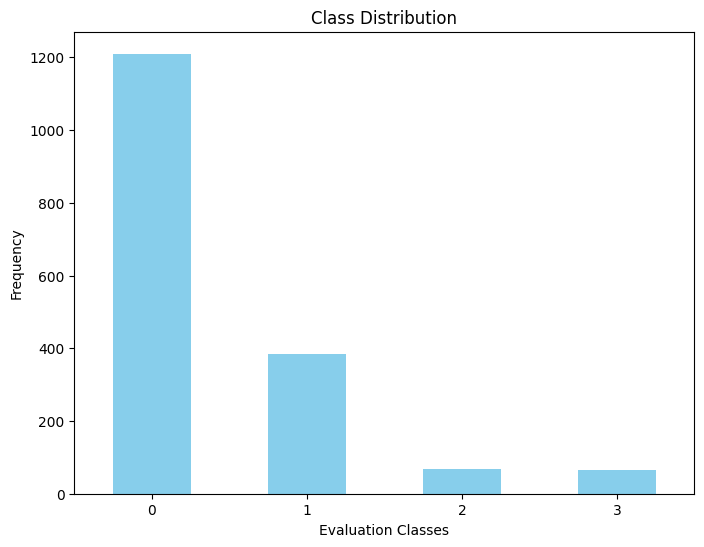

In [29]:
## Step 3: Feature Scaling
X = df_encoded.drop("evaluation", axis=1)
y = df_encoded["evaluation"]
class_counts = y.value_counts()
plt.figure(figsize=(8, 6))

## Check Class Distribution
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Evaluation Classes')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

In [30]:
# Step 4: Over-Sample the unblanced target variable (evaluation column)
from imblearn.over_sampling import SMOTE
from collections import Counter

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.astype(int)
y_train = y_train.astype(int)

# Apply SMOTE to the training set for oversampling
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Normalize the feature data using StandardScaler
scaler = StandardScaler()
X_train_resampled_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import matthews_corrcoef

# Define the parameter grid for hyperparameter tuning
param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Define a custom scoring function using MCC
scorer = make_scorer(matthews_corrcoef)

# Initialize variables to store MCC scores and results
mcc_scores = []
cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
# Nested cross-validation
for train_idx, test_idx in cv_outer.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    X_train = X_train.astype(int)
    y_train = y_train.astype(int)
    
    # Apply SMOTE to the training set
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Initialize the decision tree classifier
    clf = DecisionTreeClassifier(random_state=42)
    
    # Perform grid search with cross-validation on the oversampled training data
    grid_search = GridSearchCV(clf, param_grid, cv=3, scoring=scorer)
    grid_search.fit(X_train_resampled, y_train_resampled)
    
    # Get the best estimator (decision tree model) from the grid search
    best_clf = grid_search.best_estimator_
    
    # Predict on the test set
    y_pred = best_clf.predict(X_test)
    
    # Calculate MCC and store the score
    mcc = matthews_corrcoef(y_test, y_pred)
    mcc_scores.append(mcc)
# Calculate and display the average MCC score
avg_mcc = np.mean(mcc_scores)
print(f"Average MCC: {avg_mcc}")

Average MCC: 0.8819524431813669


### K-NN

In [38]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, matthews_corrcoef
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [41]:
# Define the parameter grid for hyperparameter tuning (for relevant models)
# Initialize
param_grid_knn = {
    "n_neighbors": list(range(1, 10)),
    "weights": ["uniform", "distance"]}

mcc_scores = []
confusion_knn = []
classification_reports = []
num_trials = 5
scaler = StandardScaler()

In [42]:
# Nested cross-validation for K-Nearest Neighbors (KNN)
for i in range(num_trials):
    X_knn_scaled = scaler.fit_transform(X_resampled)  # Use the oversampled data
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid_knn, cv=inner_cv)
    nested_score_knn = cross_val_score(clf_knn, X=X_knn_scaled, y=y_resampled, cv=outer_cv, scoring=make_scorer(matthews_corrcoef))
    mcc_scores.append(np.mean(nested_score_knn))
    
    # Train the k-NN model on the full dataset with the best parameters
    best_knn_model = clf_knn.fit(X_knn_scaled, y_resampled)
    
    # Make predictions on a hold-out test set
    X_train, X_test, y_train, y_test = train_test_split(X_knn_scaled, y_resampled, test_size=0.2, random_state=i)
    y_pred = best_knn_model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_knn.append(cm)
    
    # Calculate classification report
    report = classification_report(y_test, y_pred, target_names=["unacc", "acc", "good", "vgood"])
    classification_reports.append(report)

# Calculate and display the average MCC score for KNN
avg_mcc_knn = np.mean(mcc_scores)
print(f"Average MCC for K-Nearest Neighbors (KNN): {avg_mcc_knn}")

Average MCC for K-Nearest Neighbors (KNN): 0.9667830057759318


### Logistic Regression

In [43]:
# Define a simplified parameter grid for Logistic Regression
param_grid_logistic = {
    "C": [0.1, 1, 10],
    "penalty": ["l2"]}

# Initialize variables to store MCC scores, confusion matrices, and reports
mcc_scores = []
confusion_logistic = []
classification_reports = []
num_trials = 10
scaler = StandardScaler()

In [44]:
# Nested cross-validation for Logistic Regression
for i in range(num_trials):
    X_logistic_scaled = scaler.fit_transform(X_resampled)  # Use the oversampled data
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf_logistic = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid_logistic, cv=inner_cv)
    nested_score_logistic = cross_val_score(clf_logistic, X=X_logistic_scaled, y=y_resampled, cv=outer_cv, scoring=make_scorer(matthews_corrcoef))
    mcc_scores.append(np.mean(nested_score_logistic))
    
    # Train the Logistic Regression model on the full dataset with the best parameters
    best_logistic_model = clf_logistic.fit(X_logistic_scaled, y_resampled)
    
    # Make predictions on a hold-out test set
    X_train, X_test, y_train, y_test = train_test_split(X_logistic_scaled, y_resampled, test_size=0.2, random_state=i)
    y_pred = best_logistic_model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_logistic.append(cm)
    
    # Calculate classification report
    report = classification_report(y_test, y_pred, target_names=["unacc", "acc", "good", "vgood"])
    classification_reports.append(report)

# Calculate and display the average MCC score for Logistic Regression
avg_mcc_logistic = np.mean(mcc_scores)
print(f"Average MCC for Logistic Regression: {avg_mcc_logistic}")

Average MCC for Logistic Regression: 0.8455763630121836


In [45]:
# Grid search
clf_logistic.fit(X_train, y_train)
print("Best Hyperparameters:")
print(clf_logistic.best_params_)
print("Best Accuracy:", clf_logistic.best_score_)

Best Hyperparameters:
{'C': 10, 'penalty': 'l2'}
Best Accuracy: 0.8830061983471074


### SVM

In [46]:
# Define a simplified parameter grid for SVM with 'gamma'
param_grid_svm = {
    "C": [1, 10, 100], 
    "kernel": ["rbf"],
    "gamma": [1,10,100]}
# Initialize variables to store MCC scores, confusion matrices, and reports
mcc_scores = []
confusion_svm = []
classification_reports = []
num_trials = 5 
scaler = StandardScaler()

In [47]:
# Nested cross-validation for SVM
for i in range(num_trials):
    X_svm_scaled = scaler.fit_transform(X_resampled)  # Use the oversampled data
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf_svm = GridSearchCV(estimator=SVC(), param_grid=param_grid_svm, cv=inner_cv)
    nested_score_svm = cross_val_score(clf_svm, X=X_svm_scaled, y=y_resampled, cv=outer_cv, scoring=make_scorer(matthews_corrcoef))
    mcc_scores.append(np.mean(nested_score_svm))
    
    # Train the SVM model on the full dataset with the best parameters
    best_svm_model = clf_svm.fit(X_svm_scaled, y_resampled)
    
    # Make predictions on a hold-out test set
    X_train, X_test, y_train, y_test = train_test_split(X_svm_scaled, y_resampled, test_size=0.2, random_state=i)
    y_pred = best_svm_model.predict(X_test)

# Calculate and display the average MCC score for SVM
avg_mcc_svm = np.mean(mcc_scores)
print(f"Average MCC for SVM: {avg_mcc_svm}")

Average MCC for SVM: 0.9824483796712835


### Naive Bayes

In [48]:
# Initialize variables to store MCC scores, confusion matrices, and reports
mcc_scores = []
confusion_nb = []
classification_reports = []
num_trials = 5  # Reduced the number of trials for faster execution

# Initialize StandardScaler for feature scaling
scaler = StandardScaler()

In [49]:
# Nested cross-validation for Naive Bayes
for i in range(num_trials):
    X_nb_scaled = scaler.fit_transform(X_resampled)  # Use the oversampled data
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    clf_nb = GaussianNB()
    nested_score_nb = cross_val_score(clf_nb, X=X_nb_scaled, y=y_resampled, cv=outer_cv, scoring=make_scorer(matthews_corrcoef))
    mcc_scores.append(np.mean(nested_score_nb))
    
    # Train the Naive Bayes model on the full dataset
    best_nb_model = clf_nb.fit(X_nb_scaled, y_resampled)
    
    # Make predictions on a hold-out test set
    X_train, X_test, y_train, y_test = train_test_split(X_nb_scaled, y_resampled, test_size=0.2, random_state=i)
    y_pred = best_nb_model.predict(X_test)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_nb.append(cm)
    
    # Calculate classification report
    report = classification_report(y_test, y_pred, target_names=["unacc", "acc", "good", "vgood"])
    classification_reports.append(report)

# Calculate and display the average MCC score for Naive Bayes
avg_mcc_nb = np.mean(mcc_scores)
print(f"Average MCC for Naive Bayes: {avg_mcc_nb}")

Average MCC for Naive Bayes: 0.6413400910446652


## Numerical(Ordinal) Variables

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split
from sklearn.metrics import make_scorer, matthews_corrcoef, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
# Load the dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "evaluation"]
df = pd.read_csv(url, names=column_names)

In [22]:
print(df["buying"].unique())
print(df["maint"].unique())
print(df["doors"].unique())
print(df["persons"].unique())
print(df["lug_boot"].unique())
print(df["safety"].unique())
print(df["evaluation"].unique())

['vhigh' 'high' 'med' 'low']
['vhigh' 'high' 'med' 'low']
['2' '3' '4' '5more']
['2' '4' 'more']
['small' 'med' 'big']
['low' 'med' 'high']
['unacc' 'acc' 'vgood' 'good']


In [23]:
# Convert input variable into [0, 1, 2, 3]
df["buying"] = df["buying"].map({'vhigh': 3, 'high': 2, 'med': 1, 'low': 0})
df["maint"] = df["maint"].map({'vhigh': 3, 'high': 2, 'med': 1, 'low': 0})
df["doors"] = df["doors"].map({'2': 2, '3' : 3, '4': 4, '5more': 5})
df["persons"] = df["persons"].map({'2': 2, '4' : 4, 'more': 5})
df["lug_boot"] = df["lug_boot"].map({'small': 0, 'med' : 1, 'big': 2})
df["safety"] = df["safety"].map({'low': 0, 'med' : 1, 'high': 2})

# Convert target variable into [0, 1, 2, 3]
df["evaluation"] = df["evaluation"].map({"unacc": 0, "acc": 1, "good": 2, "vgood": 3})
df

,buying,maint,doors,persons,lug_boot,safety,evaluation
0,3,3,2,2,0,0,0
1,3,3,2,2,0,1,0
2,3,3,2,2,0,2,0
3,3,3,2,2,1,0,0
4,3,3,2,2,1,1,0
...,...,...,...,...,...,...,...
1723,0,0,5,5,1,1,2
1724,0,0,5,5,1,2,3
1725,0,0,5,5,2,0,0
1726,0,0,5,5,2,1,2


In [24]:
# Split the data into features (X) and target (y)
X = df.drop("evaluation", axis=1)
y = df["evaluation"]

# Oversample the target variable using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize StandardScaler for feature scaling
scaler = StandardScaler()

# Initialize models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42, max_depth=5),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1, C=0.01, penalty='l2'),
    "Support Vector Machine": SVC(random_state=42, C=1.0, kernel='rbf', gamma='auto'),
    "Naive Bayes": GaussianNB()
}

# Initialize variables to store MCC scores
mcc_scores = {}

In [25]:
# Nested cross-validation for all models
for model_name, model in models.items():
    mcc_scores[model_name] = []
    for i in range(5): 
        X_scaled = scaler.fit_transform(X_resampled)  
        inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
        outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

        clf = GridSearchCV(estimator=model, param_grid={}, cv=inner_cv)
        nested_score = cross_val_score(clf, X=X_scaled, y=y_resampled, cv=outer_cv, scoring=make_scorer(matthews_corrcoef))
        mcc_scores[model_name].append(np.mean(nested_score))

# Display MCC scores for all models
for model_name, scores in mcc_scores.items():
    avg_mcc = np.mean(scores)
    print(f"Average MCC for {model_name}: {avg_mcc}")

Average MCC for Decision Tree: 0.8087674978625431
Average MCC for K-Nearest Neighbors: 0.9524629616501519
Average MCC for Logistic Regression: 0.8152054102307114
Average MCC for Support Vector Machine: 0.9665500627458256
Average MCC for Naive Bayes: 0.6413400910446652
